In [1]:
import tensorflow as tf 
import numpy as np

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob

In [3]:
# to attach dataset from drive and kaggle
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Cotton Disease/train'
valid_path = '/content/drive/MyDrive/Cotton Disease/val'
test_path = '/content/drive/MyDrive/Cotton Disease/test'

In [5]:
ResNet101=tf.keras.applications.ResNet101(include_top=False, weights="imagenet",input_shape= IMAGE_SIZE + [3] )

171450368/171446536 [==============================] - 1s 0us/step


In [6]:
 #we dont train this wts in resnet101 layers
for layer in ResNet101.layers:
    layer.trainable = False

In [7]:
folders = glob('/content/drive/MyDrive/Cotton Disease/train/*')

In [8]:
x = Flatten()(ResNet101.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=ResNet101.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Cotton Disease/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Cotton Disease/val',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Cotton Disease/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute

r = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=20,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 650s 10s/step - loss: 2.4656 - accuracy: 0.4418 - val_loss: 1.3210 - val_accuracy: 0.5731
Epoch 2/20
61/61 [==============================] - 37s 606ms/step - loss: 1.1323 - accuracy: 0.5802 - val_loss: 0.9410 - val_accuracy: 0.6166
Epoch 3/20
61/61 [==============================] - 37s 606ms/step - loss: 0.8903 - accuracy: 0.6340 - val_loss: 1.7459 - val_accuracy: 0.5771
Epoch 4/20
61/61 [==============================] - 38s 617ms/step - loss: 0.8872 - accuracy: 0.6520 - val_loss: 0.7646 - val_accuracy: 0.6601
Epoch 5/20
61/61 [==============================] - 38s 615ms/step - loss: 0.8421 - accuracy: 0.6740 - val_loss: 0.7249 - val_accuracy: 0.6957
Epoch 6/20
61/61 [==============================] - 38s 622ms/step - loss: 0.7989 - accuracy: 0.6817 - val_loss: 0.6477 - val_accuracy: 0.7628
Epoch 7/20
61/61 [==============================] - 38s 625ms/step - loss: 0.9003 - accuracy: 0.6679 - val_loss: 0.6731 - val_accuracy: 0.7273


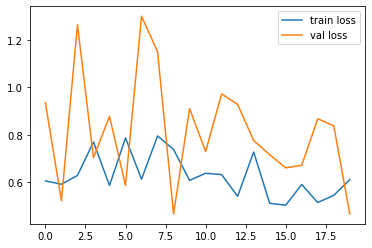

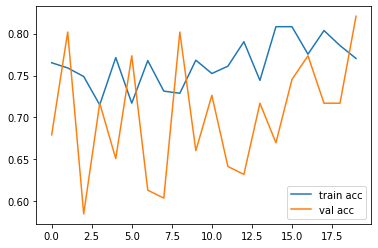

<Figure size 432x288 with 0 Axes>

In [15]:
#plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
# fit the model if the model is not overfit or underfit
# Run the cell. It will take some time to execute
r1 = model.fit_generator(
  train_generator,
  validation_data=test_generator,
  epochs=20,
  steps_per_epoch=len(train_generator),
  validation_steps=len(test_generator)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 72s 1s/step - loss: 0.6060 - accuracy: 0.7652 - val_loss: 0.9346 - val_accuracy: 0.6792
Epoch 2/20
61/61 [==============================] - 40s 652ms/step - loss: 0.5919 - accuracy: 0.7591 - val_loss: 0.5228 - val_accuracy: 0.8019
Epoch 3/20
61/61 [==============================] - 39s 644ms/step - loss: 0.6288 - accuracy: 0.7488 - val_loss: 1.2634 - val_accuracy: 0.5849
Epoch 4/20
61/61 [==============================] - 39s 635ms/step - loss: 0.7700 - accuracy: 0.7150 - val_loss: 0.7038 - val_accuracy: 0.7170
Epoch 5/20
61/61 [==============================] - 39s 639ms/step - loss: 0.5865 - accuracy: 0.7714 - val_loss: 0.8778 - val_accuracy: 0.6509
Epoch 6/20
61/61 [==============================] - 39s 636ms/step - loss: 0.7867 - accuracy: 0.7171 - val_loss: 0.5870 - val_accuracy: 0.7736
Epoch 7/20
61/61 [==============================] - 39s 641ms/step - loss: 0.6132 - accuracy: 0.7678 - val_loss: 1.2993 - val_accuracy: 0.6132
Ep

In [21]:
#plot the loss
import matplotlib.pyplot as plt
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r1.history['accuracy'], label='train acc')
plt.plot(r1.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

NameError: ignored

In [16]:
!pwd

/content


In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_ResNet101.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
